# python大数据作业2

李锦韬 2201213292

**作业要求：**

- 使用乳腺癌预测数据集`breast_cancer.csv`
- 读取数据并将数据集划分为训练集和测试集，使用随机森林方法进行预测，并输出在测试集上的准确率，绘制ROC曲线并获得AUC指标。
- 采用决策树桩（深度为1的决策树，即每次只采用一个特征的一个阈值作为划分依据）作为基本分类器，探究随基本分类器个数变化（1-100个），随机森林在测试集上的准确率的变化，画出变化曲线并进行分析。

## 1.数据预处理

### 1.1读入数据
首先读入数据，把握数据的基本情况和内容：
- 使用`pandas`读入csv格式的数据
- 使用`pandas`的`info()`方法查看数据的基本信息

In [2]:
import pandas as pd
# 读取数据
data = pd.read_csv('breast_cancer.csv')
# 查看数据情况
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              561 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           563 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

- 查看数据中正负样本的数量

In [3]:
print('数据中正样本的个数：', len(data[data['y']==1]))
print('数据中负样本的个数：', len(data[data['y']==0]))

数据中正样本的个数： 357
数据中负样本的个数： 212


**分析数据情况可知：**
- 数据有30个变量，总共有569条数据，其中标签为正样本的数据有357条，负样本的数据有212条
- 原始数据中变量`mean radius`缺失8条数据，变量`mean perimeter`缺失6条数据，其余变量数据正常无缺失
- 需要对缺失数据进行补全，以便后续数据处理操作

In [3]:
from sklearn.impute import SimpleImputer
# 处理缺失值，使用均值填充
imputer = SimpleImputer(strategy='mean')
# 转换为DataFrame格式
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

### 1.2数据标准化

- 原始数据各个变量的数据分布范围不一致，平均值、方差等统计量差异比较显著。本项目分别使用两种标准化方法对数据进行预处理，方便后续的预测和分析
- 使用z-score标准化方法，将数据标准化到均值为0，方差为1的正态分布。新建立数据集`X1`
- 使用min-max标准化方法，将数据标准化到[0,1]区间内。新建立数据集`X2`

In [4]:
# 输出数据的统计值
# print(data.describe())
# 区分开特征和标签
X = data.drop(['y'], axis=1) #保留原始数据
y = data['y']
# 对数据集标准化，使用z-score标准化
X1 = (X - X.mean(axis=0)) / X.std(axis=0)
# 对数据集标准化，使用min-max标准化
X2 = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

## 2.随机森林预测

### 2.1实验不同标准化方法

- 使用`sklearn`的`train_test_split`方法，将数据集划分为训练集和测试集，比例为`8:2`，
- 使用`sklearn`的`RandomForestClassifier`方法进行随机森林预测，设置基本分类器个数为 $15$
- 保持`max_depth`树的深度为默认`None`，即树将会一直扩展，直到所有的叶子节点都是同一类样本，或者达到最小样本划分`min_samples_split`的数目
- 使用`sklearn`的`accuracy_score`方法计算预测准确率
- 使用`sklearn`的`roc_curve`方法计算ROC曲线的FPR和TPR
- 使用`sklearn`的`roc_auc_score`方法计算AUC指标
- 分别对2种标准化方法的数据和原始数据进行预测，比较精度结果

-----------准确率对比-------------

无数据标准化处理的RF模型准确率： 0.9649122807017544
使用z-score标准化处理的RF模型准确率： 0.9649122807017544
使用min-max标准化处理的RF模型准确率： 0.9649122807017544
-----------AUC指标对比-------------

无数据标准化处理的RF模型AUC指标： 0.990501146413364
使用z-score标准化处理的RF模型AUC指标： 0.990501146413364
使用min-max标准化处理的RF模型AUC指标： 0.990501146413364


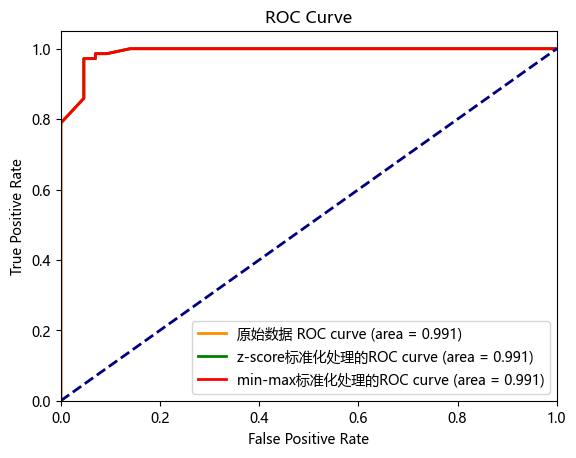

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
import matplotlib

# 划分训练集和测试集
X_train0, X_test0, y_train0, y_test0 = train_test_split(X, y, test_size=0.2, random_state=42)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y, test_size=0.2, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.2, random_state=42)

# 随机森林分类器
rf0 = RandomForestClassifier(n_estimators=15, random_state=42)
rf0.fit(X_train0, y_train0)

rf1 = RandomForestClassifier(n_estimators=15, random_state=42)
rf1.fit(X_train1, y_train1)

rf2 = RandomForestClassifier(n_estimators=15, random_state=42)
rf2.fit(X_train2, y_train2)

# 预测
y_pred0 = rf0.predict(X_test0)
y_pred1 = rf1.predict(X_test1)
y_pred2 = rf2.predict(X_test2)

matplotlib.rc("font", family='Microsoft YaHei')
# 计算准确率
print('-----------准确率对比-------------\n')
accuracy0 = accuracy_score(y_test0, y_pred0)
print("无数据标准化处理的RF模型准确率：", accuracy0)
accuracy1 = accuracy_score(y_test1, y_pred1)
print("使用z-score标准化处理的RF模型准确率：", accuracy1)
accuracy2 = accuracy_score(y_test2, y_pred2)
print("使用min-max标准化处理的RF模型准确率：", accuracy2)

# 计算ROC曲线和AUC指标
print('-----------AUC指标对比-------------\n')
y_pred_prob0 = rf0.predict_proba(X_test0)[:, 1]
fpr0, tpr0, thresholds0 = roc_curve(y_test0, y_pred_prob0)
roc_auc0 = auc(fpr0, tpr0)
print("无数据标准化处理的RF模型AUC指标：", roc_auc0)

y_pred_prob1 = rf1.predict_proba(X_test1)[:, 1]
fpr1, tpr1, thresholds1 = roc_curve(y_test1, y_pred_prob1)
roc_auc1 = auc(fpr1, tpr1)
print("使用z-score标准化处理的RF模型AUC指标：", roc_auc1)

y_pred_prob2 = rf2.predict_proba(X_test2)[:, 1]
fpr2, tpr2, thresholds2 = roc_curve(y_test2, y_pred_prob2)
roc_auc2 = auc(fpr2, tpr2)
print("使用min-max标准化处理的RF模型AUC指标：", roc_auc2)


# 绘制ROC曲线
plt.plot(fpr0, tpr0, color='darkorange', lw=2, label='原始数据 ROC curve (area = %0.3f)' % roc_auc0)
plt.plot(fpr1, tpr1, color='green', lw=2, label='z-score标准化处理的ROC curve (area = %0.3f)' % roc_auc1)
plt.plot(fpr2, tpr2, color='red', lw=2, label='min-max标准化处理的ROC curve (area = %0.3f)' % roc_auc2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


**分析实验可知：**

- 对随机森林而言，由于其模型采用多个决策树集成，因此对数据的标准化程度要求不高，不同标准化方法的预测结果没有差异


### 2.2实验不同基本分类器个数

- 由于不同标准化方法没有显著区别，本实验采用z-score标准化方法
- 使用`sklearn`的`RandomForestClassifier`方法**进行随机森林预测，设置基本分类器个数为1-100
- 保持随机森林的其他参数为默认，**特别是树的深度`max_depth`为默认值`None`**，即树将会一直扩展，直到所有的叶子节点都是同一类样本，或者达到最小样本划分`min_samples_split`的数目

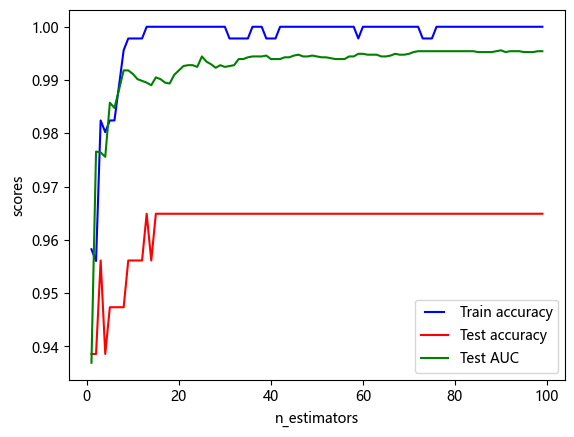

In [24]:
from matplotlib.legend_handler import HandlerLine2D
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
import matplotlib

# 划分训练集和测试集
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y, test_size=0.2, random_state=42)

# 实验不同基本分类器个数对模型的影响
n_estimators = range(1, 100)
train_results = []
test_results = []
test_auc = []
for estimator in n_estimators:
    rf1 = RandomForestClassifier(estimator, random_state=42)
    train_results.append(rf1.fit(X_train1, y_train1).score(X_train1, y_train1))
    test_results.append(rf1.fit(X_train1, y_train1).score(X_test1, y_test1))
    y_pred_prob1 = rf1.predict_proba(X_test1)[:, 1]
    fpr1, tpr1, thresholds1 = roc_curve(y_test1, y_pred_prob1)
    test_auc.append(auc(fpr1, tpr1))

matplotlib.rc("font", family='Microsoft YaHei')
# 绘制不同基本分类器个数对模型的影响
line1, = plt.plot(n_estimators, train_results, 'b', label='Train accuracy')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test accuracy')
line3, = plt.plot(n_estimators, test_auc, 'g', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('scores')
plt.xlabel('n_estimators')
plt.show()



**分析实验可知：**

- 随着基本分类器个数的增加，随机森林模型的预测准确率和AUC指标逐渐提高，但是提高幅度逐渐减小
- 在基本分类器个数达到 $20$ 以后，随机森林模型的预测准确率在测试集上的表现逐渐稳定，最高测试集上的准确率为 $0.965\%$
- 当基本分类器个数达到 $40$ 以后，随机森林模型的AUC指标在测试集上的表现也逐渐稳定，最高AUC指标为 $0.993\%$
- 进一步分析图像：
    - 在使用随机森林进行预测时，基本分类器个数的选择要适中，过多或过少都会影响预测效果
    - 过少可能达不到最佳精度欠拟合，过多则会造成计算资源的浪费且不能显著的提升模型的预测效果

## 3.决策树桩-随机森林预测

### 3.1实验不同基本分类器个数
- 由于不同标准化方法没有显著区别，本部分实验采用z-score标准化方法
- 使用`sklearn`的`DecisionTreeClassifier`方法进行决策树桩预测，设置基本分类器个数为1-300
- 使用`sklearn`的`cross_val_score`方法，在测试时使用k折交叉验证（`k=5`），更稳健地评估不同分类数量带来的影响
- 控制参数`max_depth`树的深度为1，即每次只采用一个特征的一个阈值作为划分依据，保证使用决策树桩模型

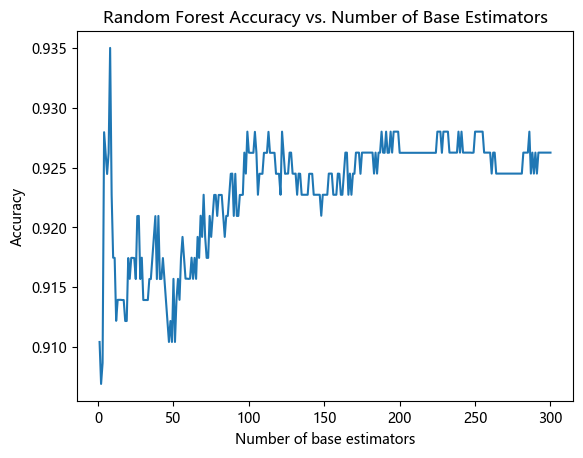

最大准确率： 0.935010091600683
最大准确率对应的基本分类器数量： 8


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# 初始化结果存储列表
results = []
n = 301
# 循环基本分类器数量
for n_estimators in range(1, n):
    # 构建随机森林分类器
    rf = RandomForestClassifier(max_depth=1, n_estimators=n_estimators, random_state=42)
    # 交叉验证计算平均准确率
    cv_scores = cross_val_score(rf, X1, y, cv=5)
    mean_cv_score = np.mean(cv_scores)
    results.append(mean_cv_score)

# 绘制随机森林准确率随基本分类器数量变化的曲线
plt.plot(range(1, n), results)
plt.xlabel('Number of base estimators')
plt.ylabel('Accuracy')
plt.title('Random Forest Accuracy vs. Number of Base Estimators')
plt.show()

print('最大准确率：', max(results))
print('最大准确率对应的基本分类器数量：', np.argmax(results) + 1)

**分析实验可知：**
- 当`n_estimators`较小时，随机森林的准确率较低，因为随机森林中只包含了较少的基本分类器，不能充分利用多个基本分类器的投票结果来做出决策。（`n_estimators<8`）
- 随着`n_estimators`的增加，随机森林的准确率会逐渐提高，直到达到一个最大值。（`n_estimators=8`）
- 如果继续再增加`n_estimators`的值，随机森林的准确率会开始下降并波动跳跃，可能因为随机森林中的基本分类器数量与变量相当，导致了部分过拟合。（`8<n_estimators<50`）
- 但进一步增加`n_estimators`，特别是分类器数量大大超过变量数量后，基本分类器的数量足越多，随机森林就越能够克服过拟合问题，重新带来准确率的提升。（`50<n_estimators<100`）
- 而当`n_estimators`数量过大时，由于分类器间的相关性会增加，导致模型性能不再提高，而是趋于稳定。

因此，在实践中，我们需要权衡模型的性能和计算成本，选择适当的基本分类器数量。

在本实验中采样5折交叉验证的方法来选择合适的n_estimators参数值，以达到最佳的模型准确率和泛化性能。最终确定的`n_estimators`参数值为8，5折平均准确率为 $93.5\%$。

**计算最佳决策树桩随机森林的精度和AUC指标：**
- 由上述的实验可知，当`n_estimators`为8时，随机森林的准确率和AUC指标最高
- 因此，在下面的代码中选择`n_estimators=8`作为最佳决策树桩随机森林的参数

使用z-score标准化处理的RF模型训练集准确率： 0.9164835164835164
使用z-score标准化处理的RF模型测试集准确率： 0.9473684210526315
使用z-score标准化处理的RF模型测试集AUC： 0.9905011464133638


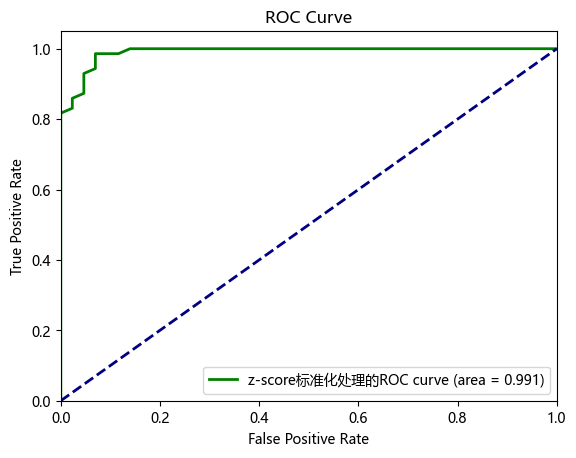

In [28]:
# 划分训练集和测试集
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y, test_size=0.2, random_state=42)

rf1 = RandomForestClassifier(max_depth=1, n_estimators=8, random_state=42)
train_results=rf1.fit(X_train1, y_train1).score(X_train1, y_train1)
print("使用z-score标准化处理的RF模型训练集准确率：", train_results)
test_results=rf1.fit(X_train1, y_train1).score(X_test1, y_test1)
print("使用z-score标准化处理的RF模型测试集准确率：", test_results)
y_pred_prob1 = rf1.predict_proba(X_test1)[:, 1]
fpr1, tpr1, thresholds1 = roc_curve(y_test1, y_pred_prob1)
test_auc=auc(fpr1, tpr1)
print("使用z-score标准化处理的RF模型测试集AUC：", test_auc)

matplotlib.rc("font", family='Microsoft YaHei')
# 绘制ROC曲线
plt.plot(fpr1, tpr1, color='green', lw=2, label='z-score标准化处理的ROC curve (area = %0.3f)' % roc_auc1)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

---

作业使用Git管理版本，项目地址[homework2](https://github.com/AkexStar/LearnPython/tree/main/homework2)

李锦韬 2023年5月10日

lijintao.alex@qq.com
